- 32*32 픽셀의 600000개 컬러 이미지
- 각 이미지는 10개의 클래스로 라벨링

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# 1. 데이터 로드 및 전처리

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("전체 학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [3]:
# cifar10의 분류
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-4-6d8a43ba86bc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


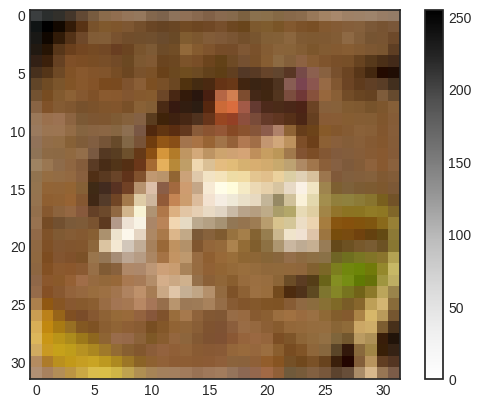

In [4]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [5]:
from tensorflow.keras.utils import to_categorical

# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_test = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

print(x_train.shape)
print(x_test.shape)

# 레이블 데이터를 범주형 형태로 변환 => 각 레이블을 원-핫 인코딩(one-hot encoding) 방식으로 변환
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

(50000, 3072)
(10000, 3072)


In [6]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_test = x_test / 255.

# 2. 모델 구성 및 컴파일

In [7]:
from tensorflow.keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Input(shape=(3072,)))

# 첫 번째 Dense 레이어
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 두 번째 Dense 레이어
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 세 번째 Dense 레이어
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# 출력 레이어
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,742,474 (6.65 MB)

 Trainable params: 1,740,682 (6.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

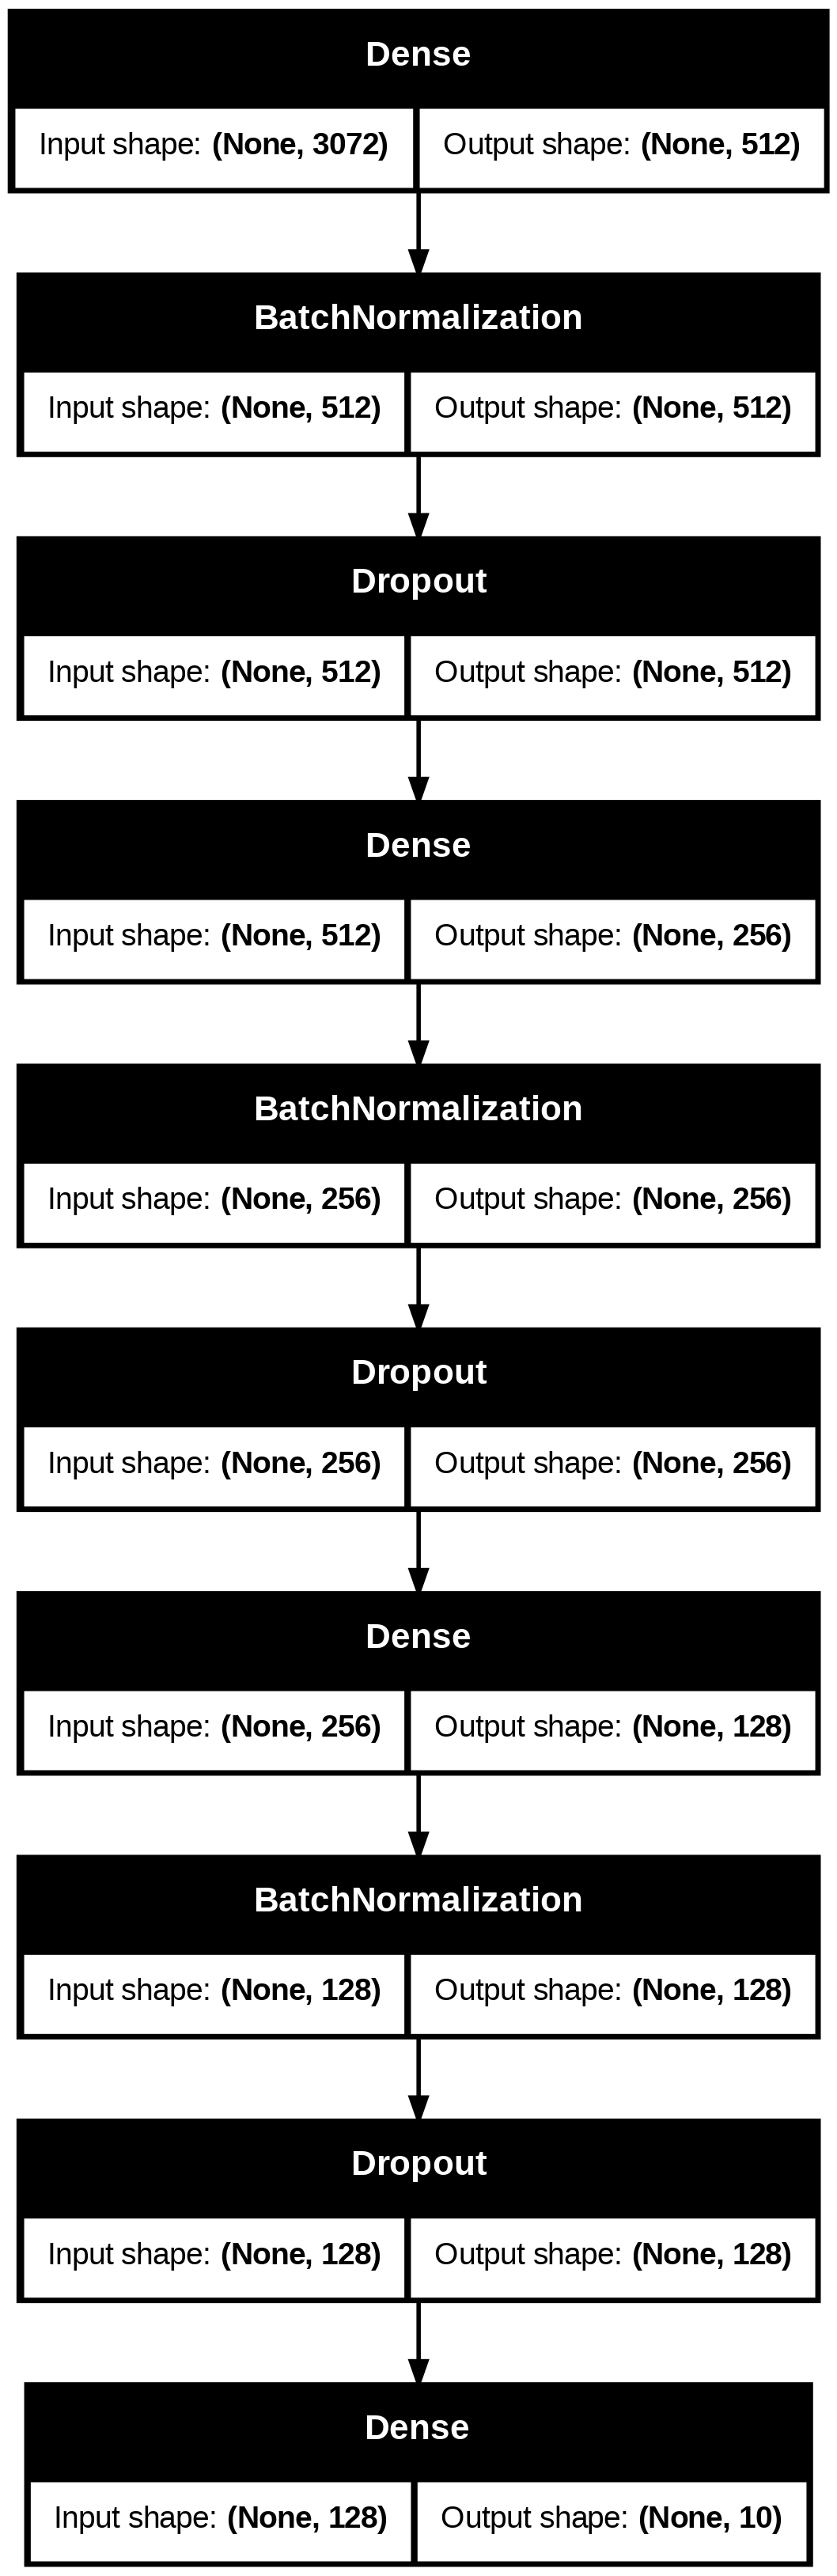

In [9]:

from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

# 3. 모델 학습

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint와 EarlyStopping 콜백 함수 설정
checkpoint_cb = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=1)
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2055 - loss: 2.5327
Epoch 1: val_loss improved from inf to 1.97345, saving model to best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.2056 - loss: 2.5322 - val_accuracy: 0.2785 - val_loss: 1.9734
Epoch 2/10
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3124 - loss: 1.9029
Epoch 2: val_loss improved from 1.97345 to 1.78855, saving model to best_model.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.3124 - loss: 1.9028 - val_accuracy: 0.3634 - val_loss: 1.7886
Epoch 3/10
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3308 - loss: 1.8365
Epoch 3: val_loss did not improve from 1.78855
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.3308 - loss: 1.8365 - val_accuracy: 0.3299 - val_loss: 1.8255
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3437 - loss: 1.8276
Epoch 4: val_loss did not improve from 1.78855
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 30

<ipython-input-11-3cd8401d05cb>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


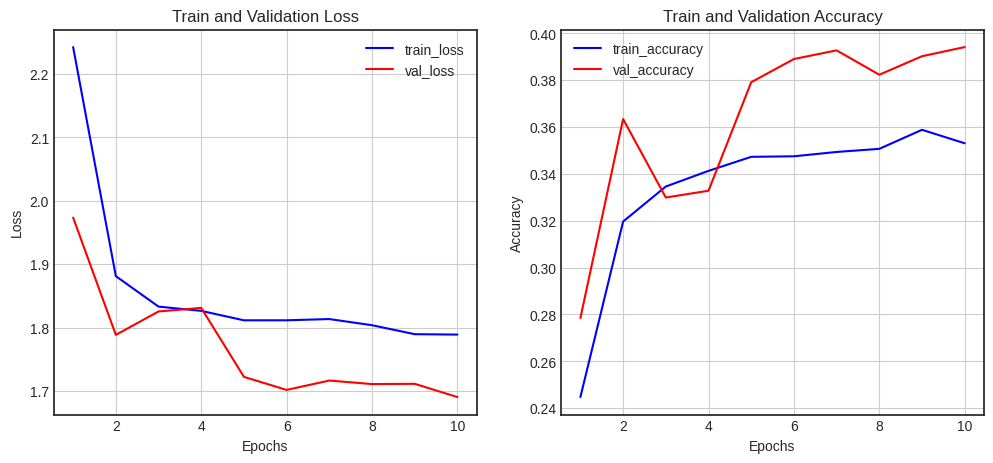

In [11]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 4. 모델 평가

In [12]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3999 - loss: 1.6491


[1.6558877229690552, 0.3982999920845032]